### Student Information
Name: IHUA-CHANG

Student ID: 106020025

GitHub ID: peter94013

---

### Instructions

1. First: do the **take home** exercises in the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 29th 11:59 pm, Tuesday)__. 

-----

# 1.TAKE HOME

-------

Preprocess data

In [1]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

-----

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [2]:
#Find data which category is 1 or 2
X.loc[X.loc[:,'category'] <= 2, :]

text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
7     From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8     From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9     From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   
...                                                 ...       ...   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

      category_name  
0     comp.graphics  
1     comp.graphics  
7           sci.med  
8           sci.med  
9           sci.med  
...             ...  
2252        sci.med  
2253        sci.med  
2254        sci.med  
2255        sci.med  
2256        sci.med  

[1658 rows x 3 columns]

----

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [3]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [4]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [5]:
result = map(lambda x: type(x),NA_df.loc[:]['missing_example'])
list(result)

[float, float, str, str, NoneType, str]

The isnull() function will not work since the 'missing_example' datatype of C,D,F is string.

------

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [6]:
X_sample = X.sample(n=1000) #random state
X_sample[0:4]

text  category  \
9     From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   
1343  From: krishnas@vax.oxford.ac.uk Subject: RE: H...         2   
2244  From: jim.zisfein@factory.com (Jim Zisfein)  S...         2   
285   From: km@cs.pitt.edu (Ken Mitchum) Subject: Re...         2   

     category_name  
9          sci.med  
1343       sci.med  
2244       sci.med  
285        sci.med

How the index sorting way is not the same as origin X, but we can use sort_index to make it sorted.

In [7]:
X_sample.sort_index()[0:4]

text  category  \
5   From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
8   From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9   From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   
11  From: amjad@eng.umd.edu (Amjad A Soomro) Subje...         1   

             category_name  
5   soc.religion.christian  
8                  sci.med  
9                  sci.med  
11           comp.graphics

I check the different propotion of category between origin data and Sample data.

In [8]:
X_prop = X.value_counts('category').sort_index()/len(X)
XSample_prop = X_sample.value_counts('category').sort_index()/len(X_sample)
diff = (X_prop - XSample_prop) / X_prop
print(diff)

category
0   -0.034458
1    0.014495
2   -0.029709
3    0.042942
dtype: float64


The different are all below 5%, can be ignored.

-----

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

                        Origin  Sample
soc.religion.christian     599     254
sci.med                    594     271
comp.graphics              584     255
alt.atheism                480     220


<AxesSubplot:title={'center':'Category distribution'}>

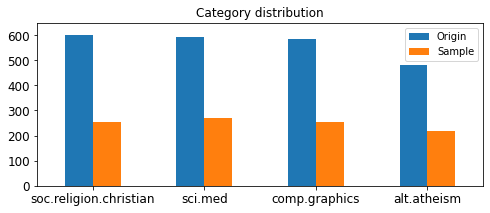

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

# Answer here
#find the maxmum upper_bound
upper_bound = max(max(X.category_name.value_counts()),max(X_sample.category_name.value_counts())) + 50

#combine two data set
comp = pd.concat([X.category_name.value_counts(), X_sample.category_name.value_counts()], axis=1)

#rename column name
comp.columns = ['Origin','Sample']

#show the result
print(comp)
comp.plot(kind = 'bar',
          y = ['Origin','Sample'],
       title = 'Category distribution',
       ylim = [0, upper_bound], 
       rot = 0, fontsize = 12, figsize = (8,3))

-----

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [10]:
import nltk
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [11]:
# Answer here
#find the index of 1 in fifth record
print(np.where(X_counts[4:5, 0:100].toarray() == 1))

#find the corresponded feature name
count_vect.get_feature_names_out()[37:38]

(array([0, 0], dtype=int64), array([ 0, 37], dtype=int64))


array(['01'], dtype=object)

The category name is '01'

----

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

First, I find the top 20 terms in the 20 articles.

In [12]:
import heapq
import seaborn as sns

#let C be the two dim array which has first 20 articels and all terms 
C = X_counts[0:20,0:X_counts.shape[1]].toarray()

#create an empty list
heap = list()

#sum the number of ith terms in first 20 articels
for i in range(0,35788):
    heap.append(sum(C[:,i]))

#Find the index of 20 most freqence term.
max_index = map(heap.index,heapq.nlargest(20,heap))

#sorted
max_20_index = sorted(list(max_index))

Then plot the new x to the graph.

D:\NTHU\110-1\Data mining\env01\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


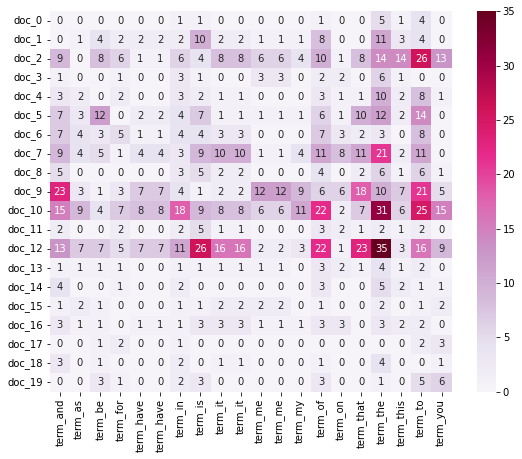

In [13]:
plot_x = ["term_"+str(i) for i in [count_vect.get_feature_names()[k] for k in max_20_index]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, [k for k in max_20_index]].toarray()

#find the max value
max_freq = max(map(max, X_counts[0:20, [k for k in max_20_index]].toarray()))

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=max_freq, annot=True)

-----

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

Reduce the dimension to 3

In [14]:
from sklearn.decomposition import PCA
# Answer here
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
X_reduced.shape

(2257, 3)

Build the 3D graph

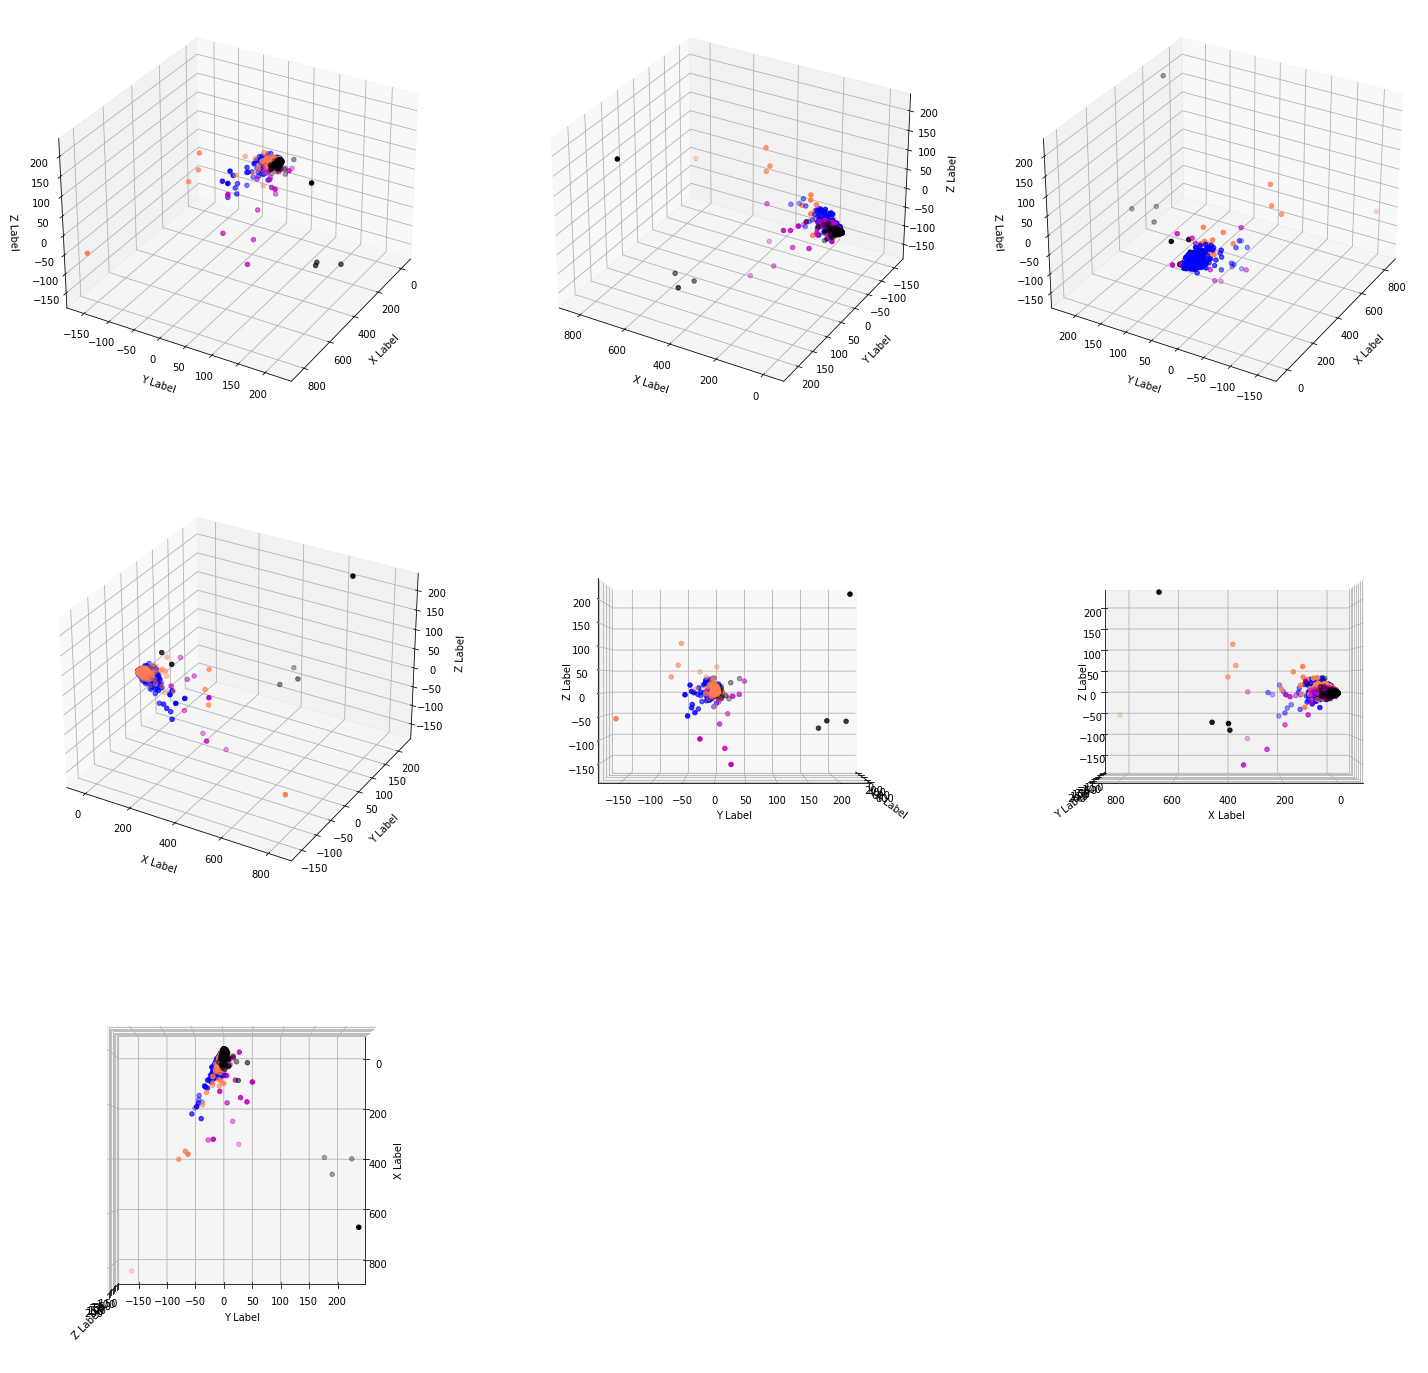

In [15]:
from mpl_toolkits.mplot3d import Axes3D
col = ['coral', 'blue', 'black', 'm']

def make_3D_graph(elev,azim,num):
    
    #set the subgraph position
    ax = fig.add_subplot(3, 3, num, projection='3d') 
    
    #build the graph
    for c, category in zip(col, categories):
        tar = X_reduced[X['category_name'] == category]
        xs = tar.T[0]
        ys = tar.T[1]
        zs = tar.T[2]
        ax.scatter(xs, ys, zs, c = c, marker='o')
    ax.set_xlabel('\nX Label')
    ax.set_ylabel('\nY Label')
    ax.set_zlabel('\nZ Label')
    
    #ajust the view angel
    ax.view_init(elev,azim)

    
# set the plot size
fig = plt.figure(figsize=(25,25))

#plot the graph
make_3D_graph(30,30,1)
make_3D_graph(30,120,2)
make_3D_graph(30,210,3)
make_3D_graph(30,300,4)
make_3D_graph(0,0,5)
make_3D_graph(0,90,6)
make_3D_graph(90,0,7)

plt.show()

I tried 7 different angel , but can't find a proper way to seperate all the catgories.
It seems like there's a blackhole in the middle of 3D graph, every catgory are in that blackhole.

-----

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

Combine two list to a dataframe

In [16]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
data = {
    'Category' : count_vect.get_feature_names()[:300],
    'Frequency' : term_frequencies[:300]
}
comb_data = pd.DataFrame(data)
comb_data

D:\NTHU\110-1\Data mining\env01\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Category  Frequency
0              00        134
1             000         92
2            0000          1
3      0000001200          2
4    000005102000          1
..            ...        ...
295           103          4
296          1030          1
297        103237          3
298         10368          1
299          1039          1

[300 rows x 2 columns]

Use plotly to plot interactive graph

In [17]:
# Answer here
import plotly.express as px

fig = px.bar(
            comb_data,
            x = 'Category',
            y = 'Frequency',
            text = 'Frequency',
            )
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

-----

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


-------
I pick the category that frequency is over 20.

In [19]:
red_term_frequencies = []
red_index = []
for j in range(0,int(X_counts.shape[1]/3)): 
    s = sum(X_counts[:,j].toarray())[0]
    #if frequency is over 20, then append it to list
    if s>=1000 :
        red_term_frequencies.append(s)
        red_index.append(j)

In [20]:
#convert the category and frequency to dataframe
data = {
    'Category' : [(count_vect.get_feature_names()[i]) for i in red_index],
    'Frequency' : red_term_frequencies[:]
}
comb_data = pd.DataFrame(data)

D:\NTHU\110-1\Data mining\env01\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [21]:
# Answer here
import plotly.express as px

fig = px.bar(
            comb_data,
            x = 'Category',
            y = 'Frequency',
            text = 'Frequency',
            )
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

----

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [22]:
# Answer here
data = {
    'Category' : count_vect.get_feature_names()[:3000],
    'Frequency' : term_frequencies[:3000]
}
comb_data = pd.DataFrame(data)
sorted_data = comb_data.sort_values(["Frequency"],ascending=False)
fig = px.area(sorted_data, x="Category", y="Frequency")
fig.show()

----

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [23]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
X['bin_category'] = mlb.transform(X['category']).tolist()

# Answer here
mlb.fit(X.category_name)
mlb.classes_
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name                                           unigrams  \
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...   
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...   
4  soc.religion.christian  [From, :, stanly, @, grok11.columbiasc.ncr.com...   
5  soc.religion.christian  [From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...   
6  soc.religion.christian  [From, :, jodfishe, @, silver.ucs.indiana.edu,...   
7                 sci.med  [From, :, aldridge, @, netcom.com, (, Jacqueli...   
8                 sci.med  [From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...   

   bin_category bin_category_name  
0  [0, 1, 0, 0]      [0, 1, 0, 0]  
1  [0, 1, 0, 0]      [0, 1, 0, 0]  
2  [0, 0, 0, 1]      [0, 0, 0, 1]  
3  [0, 0, 0, 1]      [0, 0, 0, 1]  
4  [0, 0, 0, 1]      [0, 0, 0, 1]  
5  [0, 0, 0, 1]      [0, 0, 0, 1]  
6  [0, 0, 0, 1]      [0, 0, 0, 1]  
7  [0, 0, 1, 0]      [0, 0, 1, 0]  
8  [0, 0, 1, 0]      [0, 0, 1, 0]

It still work, since the category_name are four group as same as catrgory.

----

# 2. Apply the new dataset

----

## 1. The Data
----
This dataset was created for the Paper 'From Group to Individual Labels using Deep Features', Kotzias et. al,. KDD 2015
Please cite the paper if you want to use it :)

It contains sentences labelled with positive or negative sentiment.

Score is either 1 (for positive) or 0 (for negative)
The sentences come from three different websites/fields:

imdb.com
amazon.com
yelp.com

For each website, there exist 500 positive and 500 negative sentences. Those were selected randomly for larger datasets of reviews.
We attempted to select sentences that have a clearly positive or negative connotaton, the goal was for no neutral sentences to be selected.

## 2. Data Preparation & Data Transformation
----

In [24]:
import pandas as pd

#READ THE TEXT DATA
df_1 = pd.read_csv(
    './sls/amazon_cells_labelled.txt', sep="\t",header=None)
df_2 = pd.read_csv(
    './sls/imdb_labelled.txt', sep="\t",header=None)
df_3 = pd.read_csv(
    './sls/yelp_labelled.txt', sep="\t",header=None)

#COMBINE THE THREE DATA
X = pd.concat([df_1,df_2,df_3])

#RESET INDEX
X.reset_index(inplace=True, drop=True)

#RENAME COLUMNS NAME
categories = ['text','category']
X.columns = ['text','category']

#ADD CATEGORY LABEL
X['category_name'] = X.category.apply(lambda t: 'negative' if t==0 else 'positive')

In [25]:
X[0:10]

text  category category_name
0  So there is no way for me to plug it in here i...         0      negative
1                        Good case, Excellent value.         1      positive
2                             Great for the jawbone.         1      positive
3  Tied to charger for conversations lasting more...         0      negative
4                                  The mic is great.         1      positive
5  I have to jiggle the plug to get it to line up...         0      negative
6  If you have several dozen or several hundred c...         0      negative
7        If you are Razr owner...you must have this!         1      positive
8                Needless to say, I wasted my money.         0      negative
9                   What a waste of money and time!.         0      negative

## 4. Data Mining using Pandas
----

In [26]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))
#THERE'S NO MISSING DATA


text                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                        category_name  
0  The amoung of missing records is:   
1                                   0

In [27]:
sum(X.duplicated())
#THERE'S DUPLICATED DATA

17

In [28]:
#DROP ALL THE DUPLICATES DATA
X.drop_duplicates(keep=False, inplace=True)
sum(X.duplicated())

0

## 5.  Data Preprocessing
----

### 5.1 Sampling

          Origin  Sample
positive    1366     488
negative    1348     512


<AxesSubplot:title={'center':'Category distribution'}>

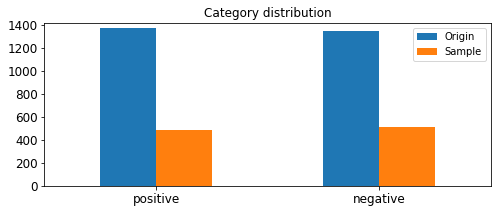

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

#random state
X_sample = X.sample(n=1000) 

#find the maxmum upper_bound
upper_bound = max(max(X.category_name.value_counts()),max(X_sample.category_name.value_counts())) + 50

#combine two data set
comp = pd.concat([X.category_name.value_counts(), X_sample.category_name.value_counts()], axis=1)

#rename column name
comp.columns = ['Origin','Sample']

#show the result
print(comp)
comp.plot(kind = 'bar',
          y = ['Origin','Sample'],
       title = 'Category distribution',
       ylim = [0, upper_bound], 
       rot = 0, fontsize = 12, figsize = (8,3))


### 5.2 Feature Creation

In [30]:
import nltk
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))
X[:10]

text  category category_name  \
0  So there is no way for me to plug it in here i...         0      negative   
1                        Good case, Excellent value.         1      positive   
2                             Great for the jawbone.         1      positive   
3  Tied to charger for conversations lasting more...         0      negative   
4                                  The mic is great.         1      positive   
5  I have to jiggle the plug to get it to line up...         0      negative   
6  If you have several dozen or several hundred c...         0      negative   
7        If you are Razr owner...you must have this!         1      positive   
8                Needless to say, I wasted my money.         0      negative   
9                   What a waste of money and time!.         0      negative   

                                            unigrams  
0  [So, there, is, no, way, for, me, to, plug, it...  
1               [Good, case, ,, Excellent, value, .]  
2                      [Great, for, the, jawbone, .]  
3  [Tied, to, charger, for, conversations, lastin...  
4                           [The, mic, is, great, .]  
5  [I, have, to, jiggle, the, plug, to, get, it, ...  
6  [If, you, have, several, dozen, or, several, h...  
7  [If, you, are, Razr, owner, ..., you, must, ha...  
8    [Needless, to, say, ,, I, wasted, my, money, .]  
9       [What, a, waste, of, money, and, time, !, .]

### 5.3 Feature subset selection

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
X_counts.shape

(2714, 5153)

D:\NTHU\110-1\Data mining\env01\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



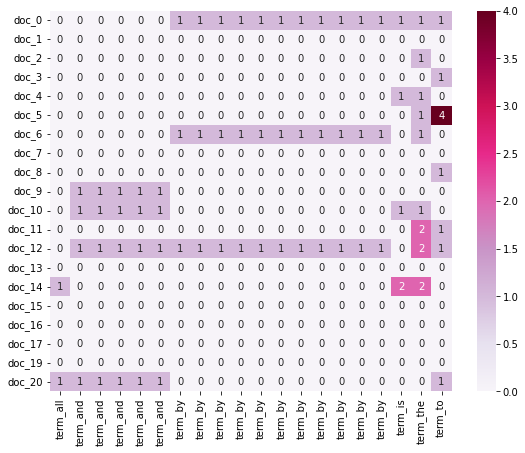

In [32]:
import heapq

#let C be the two dim array which has first 20 articels and all terms 
C = X_counts[0:20,0:X_counts.shape[1]].toarray()

#create an empty list
heap = list()

#sum the number of ith terms in first 20 articels
for i in range(0,X_counts.shape[1]):
    heap.append(sum(C[:,i]))

#Find the index of 20 most freqence term.
max_index = map(heap.index,heapq.nlargest(20,heap))

#sorted
max_20_index = sorted(list(max_index))

plot_x = ["term_"+str(i) for i in [count_vect.get_feature_names()[k] for k in max_20_index]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, [k for k in max_20_index]].toarray()

#find the max value
max_freq = max(map(max, X_counts[0:20, [k for k in max_20_index]].toarray()))

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=max_freq, annot=True)

### 5.4 Dimensionality Reduction

In [33]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())


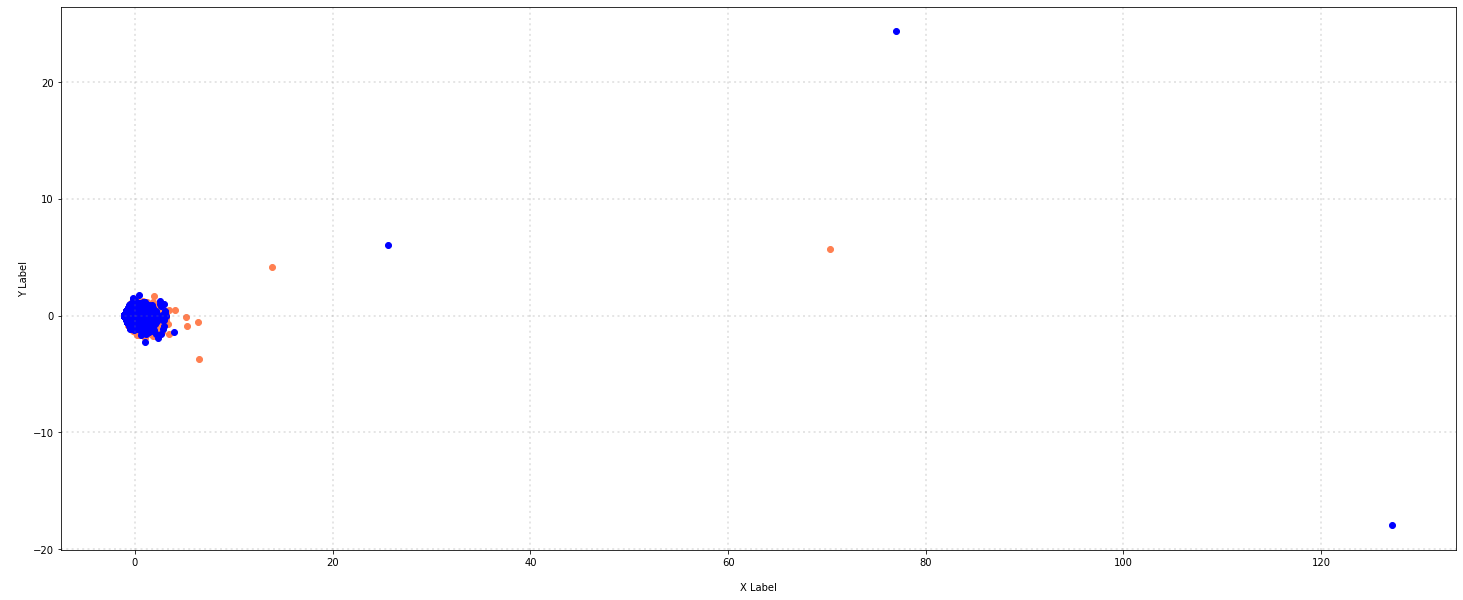

In [34]:
col = ['coral', 'blue']
categories = ['positive','negative']
# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

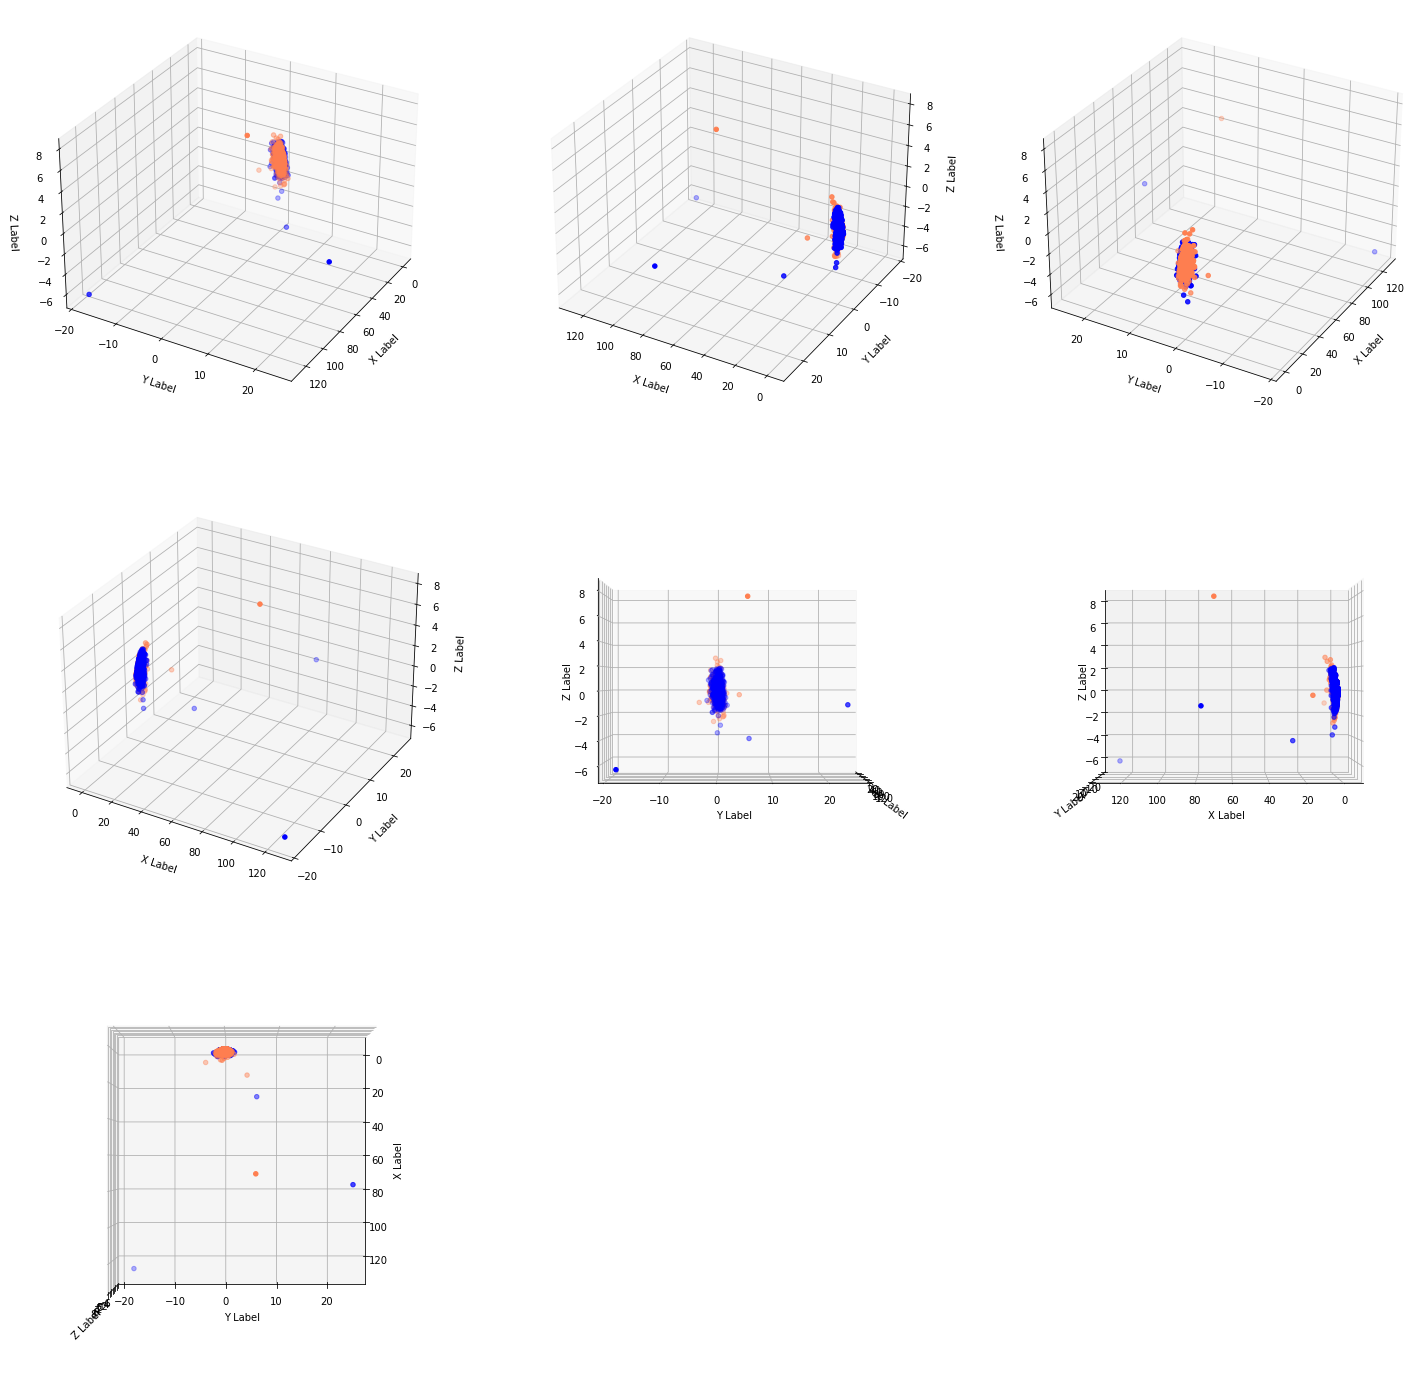

In [35]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
from mpl_toolkits.mplot3d import Axes3D
col = ['coral', 'blue', 'black', 'm']

def make_3D_graph(elev,azim,num):
    
    #set the subgraph position
    ax = fig.add_subplot(3, 3, num, projection='3d') 
    
    #build the graph
    for c, category in zip(col, categories):
        tar = X_reduced[X['category_name'] == category]
        xs = tar.T[0]
        ys = tar.T[1]
        zs = tar.T[2]
        ax.scatter(xs, ys, zs, c = c, marker='o')
    ax.set_xlabel('\nX Label')
    ax.set_ylabel('\nY Label')
    ax.set_zlabel('\nZ Label')
    
    #ajust the view angel
    ax.view_init(elev,azim)

    
# set the plot size
fig = plt.figure(figsize=(25,25))

#plot the graph
make_3D_graph(30,30,1)
make_3D_graph(30,120,2)
make_3D_graph(30,210,3)
make_3D_graph(30,300,4)
make_3D_graph(0,0,5)
make_3D_graph(0,90,6)
make_3D_graph(90,0,7)

plt.show()

It seems like that there is a surface parallel to Y-Z plane, which can seperate orange and blue dots.

### 5.5 Atrribute Transformation / Aggregation

In [36]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [37]:
data = {
    'Category' : count_vect.get_feature_names()[:300],
    'Frequency' : term_frequencies[:300]
}
comb_data = pd.DataFrame(data)

D:\NTHU\110-1\Data mining\env01\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [38]:
# Answer here
import plotly.express as px

fig = px.bar(
            comb_data,
            x = 'Category',
            y = 'Frequency',
            text = 'Frequency',
            )
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [39]:
# Answer here
data = {
    'Category' : count_vect.get_feature_names()[:],
    'Frequency' : term_frequencies[:]
}
comb_data = pd.DataFrame(data)
sorted_data = comb_data.sort_values(["Frequency"],ascending=False)
fig = px.area(sorted_data, x="Category", y="Frequency")
fig.show()

In [40]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
data = {
    'Category' : count_vect.get_feature_names()[:500],
    'Frequency' : term_frequencies_log[:500]
}
comb_data = pd.DataFrame(data)
fig = px.bar(
            comb_data,
            x = 'Category',
            y = 'Frequency',
            text = 'Frequency',
            )
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

### 5.6 Discretization and Binarization

In [41]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
X['bin_category'] = mlb.transform(X['category']).tolist()
X[0:9]

text  category category_name  \
0  So there is no way for me to plug it in here i...         0      negative   
1                        Good case, Excellent value.         1      positive   
2                             Great for the jawbone.         1      positive   
3  Tied to charger for conversations lasting more...         0      negative   
4                                  The mic is great.         1      positive   
5  I have to jiggle the plug to get it to line up...         0      negative   
6  If you have several dozen or several hundred c...         0      negative   
7        If you are Razr owner...you must have this!         1      positive   
8                Needless to say, I wasted my money.         0      negative   

                                            unigrams bin_category  
0  [So, there, is, no, way, for, me, to, plug, it...          [0]  
1               [Good, case, ,, Excellent, value, .]          [1]  
2                      [Great, for, the, jawbone, .]          [1]  
3  [Tied, to, charger, for, conversations, lastin...          [0]  
4                           [The, mic, is, great, .]          [1]  
5  [I, have, to, jiggle, the, plug, to, get, it, ...          [0]  
6  [If, you, have, several, dozen, or, several, h...          [0]  
7  [If, you, are, Razr, owner, ..., you, must, ha...          [1]  
8    [Needless, to, say, ,, I, wasted, my, money, .]          [0]

# 6. Data Exploration
---

In [42]:
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [43]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)


In [44]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


# 3. Tasks on the new dataset


----

## New data visualizations
----

I plot the cree plot to show the relation between variance and each component.

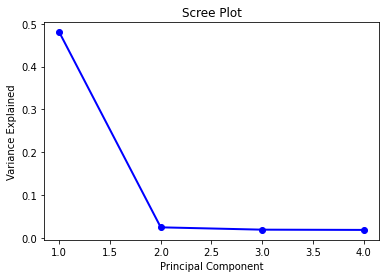

In [63]:
pca = PCA(n_components=4)
pca_fit = pca.fit(X_counts.toarray())

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

It seems like that the first and second components is sufficient to present the total variance.

## TF-IDF features

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
#using the count vectorizer
count = CountVectorizer()
word_count=count.fit_transform(X.text)
print(word_count.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [47]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count)
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=count.get_feature_names(),columns=["idf_weights"])
#inverse document frequency
df_idf.sort_values(by=['idf_weights'])

D:\NTHU\110-1\Data mining\env01\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



idf_weights
the           1.816470
and           2.122090
it            2.494729
is            2.528121
this          2.609438
...                ...
hole          8.213400
holiday       8.213400
hollander     8.213400
hilt          8.213400
zombiez       8.213400

[5153 rows x 1 columns]

In [48]:
#tfidf
tf_idf_vector=tfidf_transformer.transform(word_count)
feature_names = count.get_feature_names()
first_document_vector=tf_idf_vector[1]
df_tfifd= pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
df_tfifd.sort_values(by=["tfidf"],ascending=False)

D:\NTHU\110-1\Data mining\env01\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



tfidf
value      0.633782
case       0.511048
excellent  0.473706
good       0.335786
practice   0.000000
...             ...
feet       0.000000
feels      0.000000
feelings   0.000000
feeling    0.000000
zombiez    0.000000

[5153 rows x 1 columns]

In [49]:
vectorizer = TfidfVectorizer()
response = vectorizer.fit_transform(X.text)
print("n_samples: %d, n_features: %d" % response.shape)

n_samples: 2714, n_features: 5153


In [50]:
from sklearn.naive_bayes import MultinomialNB
#naive bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(response, np.array(X.category.tolist()))

MultinomialNB()

In [51]:
y_pred = naive_bayes_classifier.predict(response)
print(metrics.classification_report(np.array(X.category.tolist()), y_pred, target_names=['Positive', 'Negative']))

              precision    recall  f1-score   support

    Positive       0.94      0.96      0.95      1348
    Negative       0.96      0.94      0.95      1366

    accuracy                           0.95      2714
   macro avg       0.95      0.95      0.95      2714
weighted avg       0.95      0.95      0.95      2714



In [52]:
print("Confusion matrix:")
print(metrics.confusion_matrix(np.array(X.category.tolist()), y_pred))

Confusion matrix:
[[1294   54]
 [  86 1280]]


### Naive Bayes classifier

In [53]:
from sklearn.model_selection import train_test_split
#seperate the data to two gorup, test data and validation data
X_train, X_validation, y_train, y_validation = train_test_split(X.text, np.array(X.category.tolist()), test_size = 0.33, random_state = 42)

In [54]:
#using the count vectorizer
count = CountVectorizer()
X_train_count=count.fit_transform(X_train)
X_validation_count = count.transform(X_validation)

#using the tf_idf
tf_idf = TfidfVectorizer()
X_train_tf = tf_idf.fit_transform(X_train)
X_test_tf = tf_idf.transform(X_validation)

In [55]:
#build the count model and apply to X_validation_count
naive_bayes_classifier_count = MultinomialNB()
naive_bayes_classifier_count.fit(X_train_count, y_train)
y_pred_count = naive_bayes_classifier_count.predict(X_validation_count)

#build the tfidf model and apply to X_test_tf
naive_bayes_classifier_tfidf = MultinomialNB()
naive_bayes_classifier_tfidf.fit(X_train_tf, y_train)
y_pred_tfidf = naive_bayes_classifier_tfidf.predict(X_test_tf)

In [56]:
print("count score")
print("%.3f"%(naive_bayes_classifier_count.score(X_validation_count,y_validation)))
print("tfidf score")
print("%.3f"%(naive_bayes_classifier_tfidf.score(X_test_tf,y_validation)))

count score
0.787
tfidf score
0.790


In [57]:
#print the confusion matrix
print("Vector count naive bayes Confusion matrix:")
print(metrics.confusion_matrix(y_validation, y_pred_count))

print("tf_idf naive bayes Confusion matrix:")
print(metrics.confusion_matrix(y_validation, y_pred_tfidf))

Vector count naive bayes Confusion matrix:
[[344  92]
 [ 99 361]]
tf_idf naive bayes Confusion matrix:
[[343  93]
 [ 95 365]]


In [58]:
def print_Pricision_recall(M):
    print("Pricision: %.3f"%(M[0][0]/(M[0][0]+M[0][1])))
    print("Recall: %.3f"%(M[0][0]/(M[0][0]+M[1][0])))

print("Vector")
print_Pricision_recall(metrics.confusion_matrix(y_validation, y_pred_count))
print("-------")
print("tf_idf")
print_Pricision_recall(metrics.confusion_matrix(y_validation, y_pred_tfidf))

Vector
Pricision: 0.789
Recall: 0.777
-------
tf_idf
Pricision: 0.787
Recall: 0.783


It seems like in this data set, there's no huge different between CountVector and Tf_idf when applying Naive Bayes classifier.
The different of Pricision and Rcall smaller or equal to 1% ,it's really close. 

# 4.Improvement

In [59]:
#In 5.5 Atrribute Transformation / Aggregation, we get the category frequency by sum the column
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

#but then we did
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

#it's is kind unnecessary since we already get term_frequencies<br>

AttributeError: 'numpy.ndarray' object has no attribute 'append'

There's something interesting when i dealt with Exercise 14.<br>
Since I have to get the value in "sum(X_counts[:,j])" which type is matrix.<br>
I get the number by "sum(X_counts[:,j])[0,0]",but something weird happened.<br>
The execution time is so long that I interrupted the kernel.<br>
In the end, I change "sum(X_counts[:,j])[0,0]" to sum(X_counts[:,j].toarray())[0]<br>
The execution time is much better than previous one.<br>